In [1]:
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense , BatchNormalization
from kerastuner.tuners import RandomSearch , Hyperband

In [4]:
%cd "Downloads\"

C:\Users\Ali\Downloads


In [5]:
df = pd.read_csv('ANN_ready.csv')
df

<IPython.core.display.Javascript object>

,Unnamed: 0,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_car,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,...,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,price_range_Budget,price_range_Luxury,price_range_Medium
0,0,0.526339,0.748188,4.431380,0,6,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
1,1,0.677607,0.980003,4.633479,0,7,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
2,2,0.860937,0.993877,3.838912,0,3,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
3,3,0.456366,0.619093,3.716087,0,9,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
4,4,0.663701,0.837588,4.627888,0,6,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,0.978181,1.064832,4.531338,0,4,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
296,297,0.603144,0.771587,4.778158,0,5,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
297,298,0.526339,1.041787,4.944162,0,11,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
298,299,1.061075,1.097257,3.954291,0,3,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1


In [6]:
X = df.copy(deep = True)
X.drop(columns = 'Selling_Price' , inplace = True)
y = df.loc[:,'Selling_Price']
print(X.shape)
print(y.shape)

(300, 111)
(300,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
n_features = X_train.shape[1]
n_features

(270, 111)
(270,)
(30, 111)
(30,)


111

In [62]:
from tensorflow.keras import Sequential

model = Sequential()
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units = 1, activation='relu', kernel_initializer='he_normal'))

In [70]:
model.compile(
        optimizer=keras.optimizers.Adam(learning_rate = 1e-4),
        loss='mse',
        metrics=
        'MeanSquaredError'
)

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                5600      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 8,201
Trainable params: 8,201
Non-trainable params: 0
_________________________________________________________________


In [72]:
# fit the model
model_history = model.fit(X_train, y_train, validation_split = 0.1 ,epochs=150, verbose=2)

Epoch 1/150
8/8 - 1s - loss: 15.7910 - mean_squared_error: 15.7910 - val_loss: 8.4787 - val_mean_squared_error: 8.4787
Epoch 2/150
8/8 - 0s - loss: 3.5254 - mean_squared_error: 3.5254 - val_loss: 0.8776 - val_mean_squared_error: 0.8776
Epoch 3/150
8/8 - 0s - loss: 0.2795 - mean_squared_error: 0.2795 - val_loss: 0.3249 - val_mean_squared_error: 0.3249
Epoch 4/150
8/8 - 0s - loss: 0.3355 - mean_squared_error: 0.3355 - val_loss: 0.3759 - val_mean_squared_error: 0.3759
Epoch 5/150
8/8 - 0s - loss: 0.3708 - mean_squared_error: 0.3708 - val_loss: 0.3758 - val_mean_squared_error: 0.3758
Epoch 6/150
8/8 - 0s - loss: 0.3795 - mean_squared_error: 0.3795 - val_loss: 0.3758 - val_mean_squared_error: 0.3758
Epoch 7/150
8/8 - 0s - loss: 0.3817 - mean_squared_error: 0.3817 - val_loss: 0.3759 - val_mean_squared_error: 0.3759
Epoch 8/150
8/8 - 0s - loss: 0.3808 - mean_squared_error: 0.3808 - val_loss: 0.3760 - val_mean_squared_error: 0.3760
Epoch 9/150
8/8 - 0s - loss: 0.3786 - mean_squared_error: 0.37

Epoch 71/150
8/8 - 0s - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.1381 - val_mean_squared_error: 0.1381
Epoch 72/150
8/8 - 0s - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.1382 - val_mean_squared_error: 0.1382
Epoch 73/150
8/8 - 0s - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 74/150
8/8 - 0s - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 75/150
8/8 - 0s - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 76/150
8/8 - 0s - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.1372 - val_mean_squared_error: 0.1372
Epoch 77/150
8/8 - 0s - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 78/150
8/8 - 0s - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.1368 - val_mean_squared_error: 0.1368
Epoch 79/150
8/8 - 0s - loss: 0.0661 - mean_squared_erro

8/8 - 0s - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 141/150
8/8 - 0s - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.1256 - val_mean_squared_error: 0.1256
Epoch 142/150
8/8 - 0s - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 143/150
8/8 - 0s - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 144/150
8/8 - 0s - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 145/150
8/8 - 0s - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 146/150
8/8 - 0s - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 147/150
8/8 - 0s - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 148/150
8/8 - 0s - loss: 0.0521 - mean_squared_error: 0.

In [73]:
print(model_history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

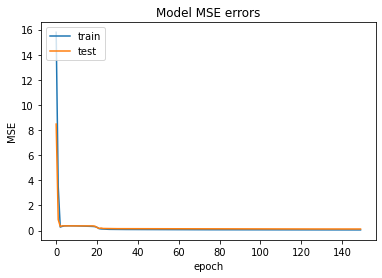

In [75]:
plt.plot(model_history.history['mean_squared_error'])
plt.plot(model_history.history['val_mean_squared_error'])
plt.title('Model MSE errors')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend(['train','test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

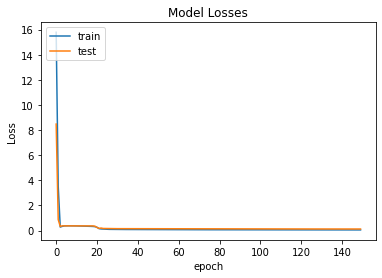

In [76]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Losses')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [77]:
loss, mse = model.evaluate(X_test, y_test, verbose=2)
print('Test mse: %.2f' % (mse*100))
print('Test Loss: %.2f' % (loss))


1/1 - 0s - loss: 0.0820 - mean_squared_error: 0.0820
Test mse: 8.20
Test Loss: 0.08


In [78]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions

(30, 1)


array([[0.91227114],
       [0.        ],
       [0.91080034],
       [0.8614963 ],
       [0.6180688 ],
       [0.        ],
       [0.77066314],
       [0.8223058 ],
       [1.3947144 ],
       [0.0378077 ],
       [0.6826693 ],
       [1.0401928 ],
       [0.        ],
       [0.8408433 ],
       [0.7440225 ],
       [0.71671313],
       [0.2654413 ],
       [1.0630573 ],
       [0.67765605],
       [0.10733151],
       [0.        ],
       [0.02592134],
       [0.        ],
       [0.1654042 ],
       [0.82798254],
       [0.15183854],
       [0.        ],
       [0.9196271 ],
       [0.7783359 ],
       [1.1363672 ]], dtype=float32)

In [79]:
from sklearn.metrics import mean_squared_error , r2_score , accuracy_score
acc = r2_score(predictions , y_test)
mse = mean_squared_error(predictions , y_test)

print(acc, mse)

0.5472373911341185 0.08198198945103413


# Keras-tunner hyperparameters tunning

In [8]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=10,
                                            max_value=500,
                                            step=5),
                               activation='elu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [9]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='ANN_project', #To store all the weights
    project_name='Car_Selling_price')

In [10]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 500, 'step': 5, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 500, 'step': 5, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [11]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [12]:
%%notify
tuner.search(X_train, y_train,
             epochs=20, 
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 33s]
val_mean_absolute_error: 0.16187251607577005

Best val_mean_absolute_error So Far: 0.16187251607577005
Total elapsed time: 00h 02m 04s
INFO:tensorflow:Oracle triggered exit


<IPython.core.display.Javascript object>

In [15]:
tuner.results_summary(num_trials = 3)

Results summary
Results in ANN_project\Car_Selling_price
Showing 3 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 17
units_0: 90
units_1: 425
learning_rate: 0.0001
units_2: 255
units_3: 180
units_4: 325
units_5: 460
units_6: 220
units_7: 305
units_8: 320
units_9: 120
units_10: 120
units_11: 245
units_12: 485
units_13: 490
units_14: 285
units_15: 395
units_16: 425
units_17: 400
units_18: 490
Score: 0.16187251607577005
Trial summary
Hyperparameters:
num_layers: 13
units_0: 395
units_1: 190
learning_rate: 0.0001
units_2: 475
units_3: 400
units_4: 430
units_5: 105
units_6: 395
units_7: 435
units_8: 220
units_9: 10
units_10: 10
units_11: 10
units_12: 10
Score: 0.17091753085454306
Trial summary
Hyperparameters:
num_layers: 9
units_0: 390
units_1: 230
learning_rate: 0.0001
units_2: 260
units_3: 10
units_4: 10
units_5: 10
units_6: 10
units_7: 10
units_8: 10
Score: 0.19765145579973856


In [25]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
best_hps
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units_0')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate') } and the number of layers are {best_hps.get('num_layers')}
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 90 and the optimal learning rate for the optimizer
is 0.0001 and the number of layers are 17



In [26]:
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, validation_split = 0.1 ,epochs=150, verbose=2)

Epoch 1/150
8/8 - 2s - loss: 0.6002 - mean_absolute_error: 0.6002 - val_loss: 0.5279 - val_mean_absolute_error: 0.5279
Epoch 2/150
8/8 - 0s - loss: 0.4326 - mean_absolute_error: 0.4326 - val_loss: 0.4183 - val_mean_absolute_error: 0.4183
Epoch 3/150
8/8 - 0s - loss: 0.3756 - mean_absolute_error: 0.3756 - val_loss: 0.3959 - val_mean_absolute_error: 0.3959
Epoch 4/150
8/8 - 0s - loss: 0.3359 - mean_absolute_error: 0.3359 - val_loss: 0.3759 - val_mean_absolute_error: 0.3759
Epoch 5/150
8/8 - 0s - loss: 0.2788 - mean_absolute_error: 0.2788 - val_loss: 0.2680 - val_mean_absolute_error: 0.2680
Epoch 6/150
8/8 - 0s - loss: 0.2663 - mean_absolute_error: 0.2663 - val_loss: 0.3058 - val_mean_absolute_error: 0.3058
Epoch 7/150
8/8 - 0s - loss: 0.2477 - mean_absolute_error: 0.2477 - val_loss: 0.2941 - val_mean_absolute_error: 0.2941
Epoch 8/150
8/8 - 0s - loss: 0.2158 - mean_absolute_error: 0.2158 - val_loss: 0.2427 - val_mean_absolute_error: 0.2427
Epoch 9/150
8/8 - 0s - loss: 0.2137 - mean_absol

Epoch 70/150
8/8 - 0s - loss: 0.1293 - mean_absolute_error: 0.1293 - val_loss: 0.2093 - val_mean_absolute_error: 0.2093
Epoch 71/150
8/8 - 0s - loss: 0.1494 - mean_absolute_error: 0.1494 - val_loss: 0.1789 - val_mean_absolute_error: 0.1789
Epoch 72/150
8/8 - 0s - loss: 0.1332 - mean_absolute_error: 0.1332 - val_loss: 0.1593 - val_mean_absolute_error: 0.1593
Epoch 73/150
8/8 - 0s - loss: 0.1476 - mean_absolute_error: 0.1476 - val_loss: 0.1931 - val_mean_absolute_error: 0.1931
Epoch 74/150
8/8 - 0s - loss: 0.1617 - mean_absolute_error: 0.1617 - val_loss: 0.1240 - val_mean_absolute_error: 0.1240
Epoch 75/150
8/8 - 0s - loss: 0.1114 - mean_absolute_error: 0.1114 - val_loss: 0.1940 - val_mean_absolute_error: 0.1940
Epoch 76/150
8/8 - 0s - loss: 0.1194 - mean_absolute_error: 0.1194 - val_loss: 0.1008 - val_mean_absolute_error: 0.1008
Epoch 77/150
8/8 - 0s - loss: 0.1160 - mean_absolute_error: 0.1160 - val_loss: 0.1437 - val_mean_absolute_error: 0.1437
Epoch 78/150
8/8 - 0s - loss: 0.1097 - m

Epoch 138/150
8/8 - 0s - loss: 0.0971 - mean_absolute_error: 0.0971 - val_loss: 0.2086 - val_mean_absolute_error: 0.2086
Epoch 139/150
8/8 - 0s - loss: 0.0923 - mean_absolute_error: 0.0923 - val_loss: 0.1105 - val_mean_absolute_error: 0.1105
Epoch 140/150
8/8 - 0s - loss: 0.0783 - mean_absolute_error: 0.0783 - val_loss: 0.1431 - val_mean_absolute_error: 0.1431
Epoch 141/150
8/8 - 0s - loss: 0.0860 - mean_absolute_error: 0.0860 - val_loss: 0.1187 - val_mean_absolute_error: 0.1187
Epoch 142/150
8/8 - 0s - loss: 0.0770 - mean_absolute_error: 0.0770 - val_loss: 0.1890 - val_mean_absolute_error: 0.1890
Epoch 143/150
8/8 - 0s - loss: 0.0808 - mean_absolute_error: 0.0808 - val_loss: 0.1132 - val_mean_absolute_error: 0.1132
Epoch 144/150
8/8 - 0s - loss: 0.0776 - mean_absolute_error: 0.0776 - val_loss: 0.1424 - val_mean_absolute_error: 0.1424
Epoch 145/150
8/8 - 0s - loss: 0.0656 - mean_absolute_error: 0.0656 - val_loss: 0.0885 - val_mean_absolute_error: 0.0885
Epoch 146/150
8/8 - 0s - loss: 0

In [28]:
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print('Test mae: %.2f' % (mae))
print('Test Loss: %.2f' % (loss))


1/1 - 0s - loss: 0.0946 - mean_absolute_error: 0.0946
Test mae: 0.09
Test Loss: 0.09
